# 制御シミュレーションのチュートリアル
このチュートリアルは，マス・ばね・ダンパ系の簡単なシミュレーションをすることで制御シミュレーションの流れをつかんでもらうことを目的としています．

## マス・ばね・ダンパ系のモデル
<img src="./fig/model.png" alt="Drawing" style="width: 600px;"/>
<div style="text-align: center;">
図 1  マス・ばね・ダンパ系のモデル
</div>
図 1 に示すマス・ばね・ダンパ系における台車の変位および速度の変化を数値シミュレーションによって確認します．

まずはシミュレーションを行うために図 1 に示す台車の数式モデルを求めましょう．この台車の数式モデルは台車の運動方程式を式変形することで作ります．台車の運動方程式は次式となります．
# $$ m\ddot{z}(t) + c\dot{z}(t) + kz(t) = F $$
ここで，$m，c，k$はそれぞれ台車のパラメータで質量，減衰係数，ばね定数です．また，$t，z，F$はそれぞれ時間，方向の変位，外力です．
台車のパラメータに関してはシミュレーションを行う前に定義しておきましょう．
下のセルに台車のパラメータを定義するコードを打ち込んでおきます．

In [7]:
m = 1    # 質量[kg]
k = 1    # ばね定数[N/m]
c = 0.2  # 減衰係数[N s/m]

次にこの運動方程式を$\dot{x} = Ax + B$のような形に変形します．制御の世界ではこれを動特性と呼びます．動特性は制御対象の動き方を表しており，台車の初期値を決めれば台車の次の状態を求めていけるようになります．
今，外力は制御入力のみで与えられるとし，自分で係数を求めてみてください．ヒントを以下に示します．    
ヒント
- $x_1(t) = z(t),\quad x_2(t) = \dot{z}(t)$とおく．
- $\dot{\bf{x}}(t) =
        \left[\begin{array}{ccc}
            \dot{x_1}(t) \\
            \dot{x_2}(t) \\
        \end{array}\right]$とする．   

$A, B$が求まったら下のセルに打ち込んでください．パラメータの値は代入せず，文字のままで打ち込んでください．

In [11]:
import numpy as np    # 数値計算のためのライブラリ
A =         # 2行2列の行列
B =         # 2行1列の行列

## 制御入力がない場合のシミュレーション
求めた動特性を使ってシミュレーションを行っていきます．まずは外力がない状態$F = u = 0$の場合を考えていきましょう．   
数値シミュレーションは台車の状態を微小時間だけ次の状態へ更新し，それを繰り返すことで行います．まずは1つ先のステップの状態を求めてみましょう．今回，$x$を更新する手法はオイラー法を用います．式を以下に示すので，下のセルに動特性と更新式を打ち込んでみてください．   
# $$ x_{after} = x_{before} + dt・\dot{x} $$

In [12]:
u = 0    # 入力なし
dt = 0.1    # 刻み幅
x1 = -5    # 台車の位置の初期値
x2 = 0    # 台車の速度の初期値
x = np.array([[x1], [x2]])    # 台車の状態


x_dot =         # 動特性
x = x +         # オイラー法

これで1つ先のステップが求められました．後はこれを繰り返せば，未来の台車の状態が求まります．ただし，上の2行のコードをfor文で囲うだけでは，グラフにしようとしたとき過去の計算結果が消えてしまいます．1ステップごとの計算結果はどこかに保存しておかなければなりません．よって次のセルに計算結果を保存するためのコードを説明します．

In [13]:
#----数値を保存用の箱----#
x_list = [[] for i in range(np.ndim(x))]    # ndimで次元を取得し，保存したい数値に合った次元の箱を生成
t_list = [[] for i in range(np.ndim(t))]

x_list = np.hstack([x_list, x])    # 数値を箱に保存(hstackは行列の結合)
t_list = np.hstack([t_list, t])

以上のことを使って，図2に示すマス・ばね・ダンパ系の数値シミュレーションを行い，台車の変位の時間変化をグラフにしましょう．
<img src="./fig/model_not_input.png" alt="Drawing" style="width: 600px;"/>
<div style="text-align: center;">
図2　マス・ばね・ダンパ系（x1 = -5）
</div>
下のセルに台車の初期値とシミュレーションを行うための初期値は打ち込んでおきます．反復回数はどれくらい先のステップまで計算するかであり，刻み幅は微小時間のことです．

In [2]:
x1 = -5    # 変位[m]
x2 = 0    # 速度[m/s]
x = np.array([[x1], [x2]])    # 状態
t = 0    # 初期時間[s]
Ns = 1000    # 反復回数
dt = 0.1    # 刻み幅[s]
u = 0    # 入力


for i in range(Ns):

    
    
    
    



#----計算結果をグラフで表示する----#
import matplotlib.pyplot as plt    # 描画ライブラリ
# 横軸に時間，縦軸に台車の変位でプロットする
plt.plot(t_list, x_list[0])

IndentationError: expected an indented block (<ipython-input-2-a5e27886ef12>, line 20)

筆者が同じ初期値でシミュレーションを行った結果を以下の図に示します．
<img src="./fig/noncontrol_result.png" alt="Drawing" style="width: 600px;"/>

## 制御入力がある場合のシミュレーション
次に，制御入力を付加して台車の変位を目標値へ制御するシミュレーションを行いましょう．制御入力は以下の式で与えます．    
# $$
u = K_pe(t) + K_i\int^t_0e(\tau)d\tau + K_d\frac{d}{dt}e(t) \\
e(t) = r - x(t)
$$
ここで，$e(t)$は目標値と現在値との偏差，$K_p, K_i, K_d$はそれぞれゲインです．

この式はPID制御と呼ばれ，制御で広く用いられる式です．この式の説明を軽くすると，第一項目は比例項(Proportional)，第二項目は積分項(Integral)，第三項目は微分項(Differential)になっています．    
比例項の部分は目標値と離れているほど大きな制御入力を与え，目標値に近づいてきたら小さな制御入力を与えます．ただし，比例項のみだと目標値付近で振動したり，収束先が目標値と離れた値（定常偏差）をとってしまうことがあります．定常偏差の例を図3に示します．
<img src="./fig/PID.png" alt="Drawing" style="width: 600px;"/>
<div style="text-align: center;">
図3　定常偏差
</div>

これらを改善するために，積分項と微分項を導入します．    
例えば図4のような結果が得られたとします．
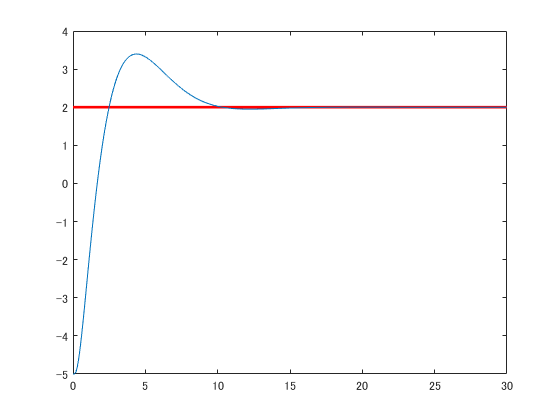
<div style="text-align: center;">
図4　積分項の説明（1）
</div>
ここで，青線が得られた結果で，赤線が目標値です．

このとき，積分項で行っている偏差の積分は図4の青線と赤線で囲まれた空間になります．この空間をピンク色で塗ったものを図5に示します．
<img src="./fig/PID_I.png" alt="Drawing" style="width: 600px;"/>
<div style="text-align: center;">
図5　積分項の説明（2）
</div>
この「偏差の積分=誤差情報の蓄積」を入力に含めれば誤差をけせるのでは？と考えたのが積分項になります．積分項を加えることで，定常偏差を0にすることができます．

微分項は偏差の勢いを表しています．この微分項は目標値に近づいてきたらブレーキをかけるような役割を持っています．例えば図4のグラフはオーバーシュート（目標値を行き過ぎる）が起きていることがわかります．微分項をうまく調整すると図6のようにオーバーシュートを消すことができます．
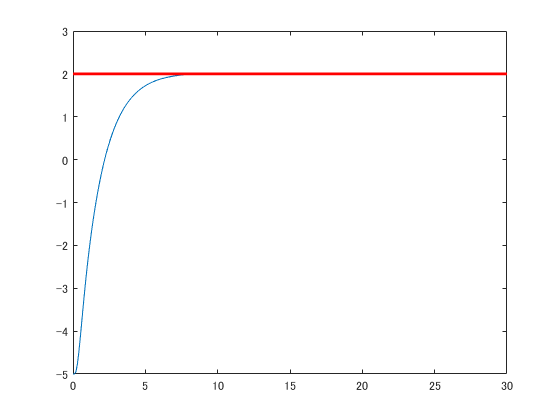
<div style="text-align: center;">
図6　微分項の調整
</div>
以上がPID制御の説明になります．このPID制御をマス・ばね・ダンパ系に導入していきましょう．

<img src="./fig/model_with_input.png" alt="Drawing" style="width: 600px;"/>
<div style="text-align: center;">
図7　マス・ばね・ダンパ系（制御あり）
</div>
制御ありのシミュレーションは制御なしの場合とほとんど変わりません．制御入力があるだけです．今までの知識を用いてシミュレーションを行い，台車の変位と時間のグラフをだしてください．台車の初期位置などは筆者が下のセルに打ち込んだので（ゲインは筆者が適当に決めた），PID制御をどう実装するかを自分で考えてみてください．

ヒントを以下に示します．   
ヒント
- 積分は足し合わせで表現できる
- 微分は現在の値と1つ前の値の差で表現できる

In [1]:
x1 = -5    # 変位[m]
x2 = 0    # 速度[m/s]
x = np.array([[x1], [x2]])    # 状態
t = 0    # 初期時間[s]
Ns = 1000    # 反復回数
dt = 0.1    # 刻み幅[s]
Kp = 0.5    # 比例ゲイン
Ki = 0.5    # 積分ゲイン
Kd = 2    # 微分ゲイン
r = 2    # 目標値



for i in range(Ns):

    
    
    
    
    
    


#----計算結果をグラフで表示する----#
import matplotlib.pyplot as plt
# 横軸に時間，縦軸に台車の変位でプロットする
plt.plot(t_list, x_list[0])

IndentationError: expected an indented block (<ipython-input-1-d19fcdd61ba8>, line 25)

筆者が同じ初期値でシミュレーションを行った結果を以下の図に示します．    
オーバーシュートが起こっているのでゲインの調整を各自してみてください．
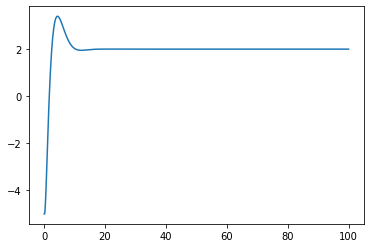

## グラフの編集方法について
今まで，グラフはデフォルトのままでしか表示させてきませんでしたが，線の色を変えたり，太さを変えたり，ラベルを貼ったりなど，pythonはグラフを色々編集できます．その例をいくつか示すので，下のセルに制御ありのシミュレーション結果を編集してみてください．    
例
- plt.plot(t_list, x1_list, color='red') : 赤色の実線に変更
- plt.plot(t_list, x1_list, linewidth='3') ： 線の太さを3ptに変更
- plt.plot(t_list, x1_list, '.') : グラフを点でプロットする
- plt.xlim(0,50) ： x軸の範囲を指定
- plt.xlabel('time[s]', fontsize=12) ： x軸のラベルを指定（フォントサイズは12pt）
- plt.xticks(np.arange(0,50,5)) : x軸の目盛り0から50を5で分割する
- plt.grid() ： グリッド線の追加

今回紹介したもの以外にもいろいろ編集コマンドはあるので，各自必要に応じて調べてください．

# 最後に
制御シミュレーションのチュートリアルにお付き合いいただきありがとうございました．これからマス・ばね・ダンパ系の制御よりも難しい問題に向き合わなければいけないと思いますが，めげずに頑張ってください．研究生活が楽しいものになることを願っています．

# 付録
付録として筆者が書いたコードを示します．今までの問題の参考例になっているので，コードの書き方など参考にしてください．
以下のURLからcodeをおとし，sample_codeを開いてください．GitHubからのおとしかたは先生か院生にきいてください．
https://github.com/kt4km/cs_tutorial  
Gitの使い方のリンクを以下に示します．    
http://172.24.137.242:8823/git_intro.html